In [53]:
import pandas as pd
import numpy as np

from venn import venn
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
RNA_DEG_7_75 = pd.read_excel(
    '../../RNA-seq/E7.75_FLAG-Lhx1_RNA_seq_gene_list.xlsx',
    sheet_name='List A protein-coding only')
RNA_DEG_7_75_up = RNA_DEG_7_75[RNA_DEG_7_75['C3_dox'] > 0]
RNA_DEG_7_75_down = RNA_DEG_7_75[RNA_DEG_7_75['C3_dox'] < 0]

In [64]:
ATAC_DEP_7_75 = pd.read_csv(
    '../../encode_data/WT_HOM_Run2_diff_filter_annotate.txt', sep='\t')

In [65]:
ATAC_DEP_7_75_WT = ATAC_DEP_7_75[ATAC_DEP_7_75['Peak Score'] > 0]
ATAC_DEP_7_75_HOM = ATAC_DEP_7_75[ATAC_DEP_7_75['Peak Score'] < 0]

ATAC_DEP_7_75_WT = ATAC_DEP_7_75_WT[
    ATAC_DEP_7_75_WT['Annotation'].str.contains('exon|promoter', regex=True)]
ATAC_DEP_7_75_HOM = ATAC_DEP_7_75_HOM[
    ATAC_DEP_7_75_HOM['Annotation'].str.contains('exon|promoter', regex=True)]

In [66]:
ATAC_DEP_7_75_WT.shape

(261, 19)

In [67]:
ATAC_DEP_7_75_HOM.shape

(218, 19)

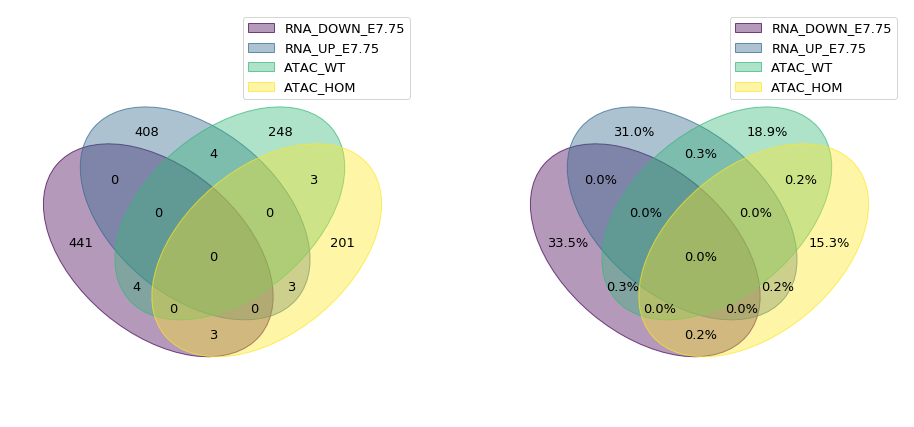

In [68]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 16))
data_venn = {
    'RNA_DOWN_E7.75': set(RNA_DEG_7_75_down['Gene name']),
    'RNA_UP_E7.75': set(RNA_DEG_7_75_up['Gene name']),
    'ATAC_WT': set(ATAC_DEP_7_75_WT['Gene Name']),
    'ATAC_HOM': set(ATAC_DEP_7_75_HOM['Gene Name'])
}
venn(data_venn, ax = ax1)
venn(data_venn, fmt="{percentage:.1f}%", ax = ax2)

In [69]:
close_but_up = ATAC_DEP_7_75_HOM[
    (ATAC_DEP_7_75_HOM['Gene Name'].isin(RNA_DEG_7_75_up['Gene name']))
    & (~ATAC_DEP_7_75_HOM['Gene Name'].isin(ATAC_DEP_7_75_WT['Gene Name']))]

In [70]:
close_but_up = close_but_up.sort_values(by=['Peak Score'])
close_but_up.head(10)

,PeakID (cmd=annotatePeaks.pl WT_HOM_Run2_diff_filter.bedgraph mm10 -cpu 10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
13581,632678,chr1,131935001,131935200,+,-1.14131,NaN,"3' UTR (NM_175294, exon 7 of 7)","3' UTR (NM_175294, exon 7 of 7)",24642,NM_001145804,98415.0,Mm.246869,NM_175294,ENSMUSG00000026434,Nucks1,2700010L10Rik|8430423A01Rik|AI647518|C78391|Nucks,nuclear casein kinase and cyclin-dependent kin...,protein-coding
9689,4732998,chr16,78334801,78335000,+,-1.03065,NaN,"exon (NM_009988, exon 6 of 8)","exon (NM_009988, exon 6 of 8)",33229,NM_009988,13052.0,Mm.66222,NM_009988,ENSMUSG00000022865,Cxadr,2610206D03Rik|AU016810|AW553441|CAR|MCAR|MCVADR,coxsackie virus and adenovirus receptor,protein-coding
9381,6031148,chr2,10164601,10164800,+,-1.02538,NaN,"exon (NM_172471, exon 2 of 14)","exon (NM_172471, exon 2 of 14)",11157,NM_172471,209378.0,Mm.313876,NM_172471,ENSMUSG00000025780,Itih5,4631408O11Rik|5430408M01Rik|E130106B02,inter-alpha (globulin) inhibitor H5,protein-coding


In [71]:
open_and_up = ATAC_DEP_7_75_WT[
    (ATAC_DEP_7_75_WT['Gene Name'].isin(RNA_DEG_7_75_up['Gene name']))]
open_and_up.head(10)

,PeakID (cmd=annotatePeaks.pl WT_HOM_Run2_diff_filter.bedgraph mm10 -cpu 10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
84,426352,chr1,89968601,89968800,+,1.39412,NaN,"exon (NM_001355134, exon 3 of 5)","exon (NM_001355134, exon 3 of 5)",-37524,NM_010262,14472.0,Mm.204730,NM_010262,ENSMUSG00000034486,Gbx2,D130058E05Rik|Gbx-2|MMoxA|Stra7,gastrulation brain homeobox 2,protein-coding
2610,5550226,chr18,58009201,58009400,+,1.09768,NaN,"3' UTR (NM_010181, exon 65 of 65)","3' UTR (NM_010181, exon 65 of 65)",130622,NM_009194,20496.0,Mm.399997,NM_009194,ENSMUSG00000024597,Slc12a2,9330166H04Rik|Nkcc1|mBSC2|sy-ns,"solute carrier family 12, member 2",protein-coding
2756,2360625,chr12,46694601,46694800,+,1.09354,NaN,"3' UTR (NM_021361, exon 5 of 5)","3' UTR (NM_021361, exon 5 of 5)",124075,NM_021361,664883.0,Mm.247195,NM_021361,ENSMUSG00000021047,Nova1,9430099M15Rik|G630039L02|Nova-1,neuro-oncological ventral antigen 1,protein-coding
5748,11028817,chr8,116574001,116574200,+,1.02566,NaN,"3' UTR (NM_029441, exon 7 of 7)","3' UTR (NM_029441, exon 7 of 7)",69085,NM_029297,75465.0,Mm.23114,NM_029297,ENSMUSG00000034467,Dynlrb2,1700009A04Rik|DNLC2B|Dncl2b,dynein light chain roadblock-type 2,protein-coding


In [72]:
open_but_down = ATAC_DEP_7_75_WT[
    (ATAC_DEP_7_75_WT['Gene Name'].isin(RNA_DEG_7_75_down['Gene name']))]
open_but_down.head()

,PeakID (cmd=annotatePeaks.pl WT_HOM_Run2_diff_filter.bedgraph mm10 -cpu 10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
373,9984749,chr7,45091401,45091600,+,1.26649,NaN,"exon (NM_026555, exon 2 of 7)","exon (NM_026555, exon 2 of 7)",713,NM_001355045,52377.0,Mm.29997,NM_026555,ENSMUSG00000019539,Rcn3,6030455P07Rik|D530026G20Rik|D7Ertd671e|RLP49,"reticulocalbin 3, EF-hand calcium binding domain",protein-coding
2603,1228789,chr10,61424601,61424800,+,1.09780,NaN,"3' UTR (NM_013611, exon 3 of 3)","3' UTR (NM_013611, exon 3 of 3)",6728,NM_013611,18119.0,Mm.57195,NM_013611,ENSMUSG00000037171,Nodal,Tg.413d,nodal,protein-coding
2682,5746409,chr19,10678001,10678200,+,1.09554,NaN,promoter-TSS (NM_021453),promoter-TSS (NM_021453),-29,NM_021453,58803.0,Mm.34037,NM_021453,ENSMUSG00000024738,Pga5,1110035E17Rik|Pepf,"pepsinogen 5, group I",protein-coding
5802,11886502,chrX,53776401,53776600,+,1.02480,NaN,promoter-TSS (NM_001009549),promoter-TSS (NM_001009549),-106,NM_001009549,333473.0,Mm.327378,NM_001009549,ENSMUSG00000059334,Zfp36l3,AY661338,"zinc finger protein 36, C3H type-like 3",protein-coding


In [73]:
close_and_down = ATAC_DEP_7_75_HOM[
    (ATAC_DEP_7_75_HOM['Gene Name'].isin(RNA_DEG_7_75_down['Gene name']))].sort_values(by=['Peak Score'])
close_and_down.head()

,PeakID (cmd=annotatePeaks.pl WT_HOM_Run2_diff_filter.bedgraph mm10 -cpu 10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
13621,7003094,chr3,31121401,31121600,+,-1.14350,NaN,"3' UTR (NM_011386, exon 7 of 7)","3' UTR (NM_011386, exon 7 of 7)",26442,NM_001271772,20482.0,Mm.15406,NM_011386,ENSMUSG00000027660,Skil,Skir|SnoN|sno,SKI-like,protein-coding
10856,11182266,chr9,21504401,21504600,+,-1.05407,NaN,"exon (NM_001253893, exon 19 of 21)","exon (NM_001253893, exon 19 of 21)",5394,NM_001324510,17083.0,Mm.196618,NM_010744,ENSMUSG00000032180,Tmed1,Il1rl1l|Ly84l|St2l,transmembrane p24 trafficking protein 1,protein-coding
9951,6735026,chr2,153619201,153619400,+,-1.03600,NaN,"3' UTR (NM_001195390, exon 10 of 10)","3' UTR (NM_001195390, exon 10 of 10)",13481,NM_001195390,99311.0,Mm.294478,NM_133850,ENSMUSG00000056941,Commd7,2310010I22Rik|AW060956|mU3,COMM domain containing 7,protein-coding


In [74]:
writer = pd.ExcelWriter('../../analysis_results/overlap_genes_alt_DEP.xlsx', engine = 'xlsxwriter')

close_but_up.to_excel(writer, sheet_name = '4genes_close_but_up', index=False)
open_and_up.to_excel(writer, sheet_name = '3genes_open_and_up', index=False)
open_but_down.to_excel(writer, sheet_name = '3genes_open_but_down', index=False)
close_and_down.to_excel(writer, sheet_name = '4genes_close_and_down', index=False)

writer.save()
writer.close()